# Image Enhancement Technique: Histogram Equalization

In [ ]:
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

In [ ]:
def download_image(url, filename):
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        with open(filename, 'wb') as file:
            file.write(response.content)
    else:
        print(f"Unable to download image. HTTP response code: {response.status_code}")


# Low contrast satelite image (good result)
url = "https://i.stack.imgur.com/eVcyg.jpg"


download_image(url, "image")

## 1. Memuat Gambar

In [ ]:
img = Image.open('image')

## 2. Konversi gambar menjadi grayscale

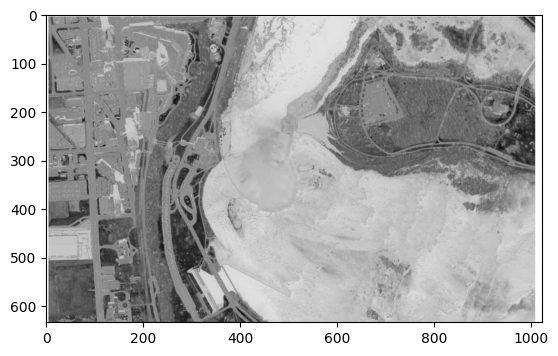

In [ ]:
img = img.convert('L')

plt.imshow(img, cmap='gray');

#### Melihat histogram citra

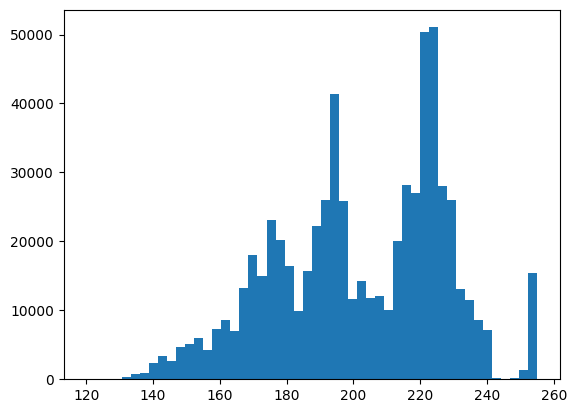

In [ ]:
img = np.asarray(img)

flat = img.flatten()

plt.hist(flat, bins=50);

## 3. Kalkulasi Histogram

In [ ]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)

    for pixel in image:
        histogram[pixel] += 1

    return histogram

hist = get_histogram(flat, 256)

## 4. Kalkulasi CDF

In [ ]:
def get_cdf(a):
    a = iter(a)
    b = [next(a)]
    for i in a:
        b.append(b[-1] + i)
    return np.array(b)

cdf = get_cdf(hist)

In [ ]:
nj = (cdf - cdf.min()) * 255
N = cdf.max() - cdf.min()

cdf = nj / N

cdf = cdf.astype('uint8')

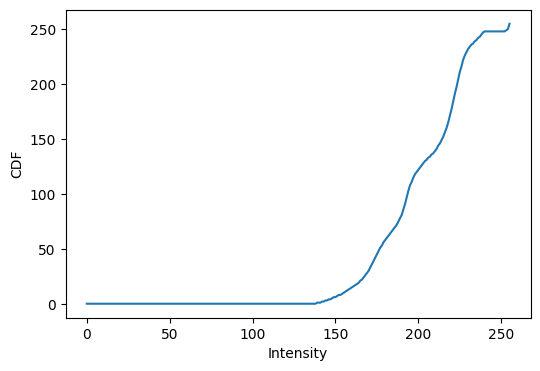

In [ ]:
plt.figure(figsize=(6,4))
plt.ylabel('CDF')
plt.xlabel('Intensity')
plt.plot(cdf);

## 5. Transformasi

In [ ]:
img_eq = cdf[flat]

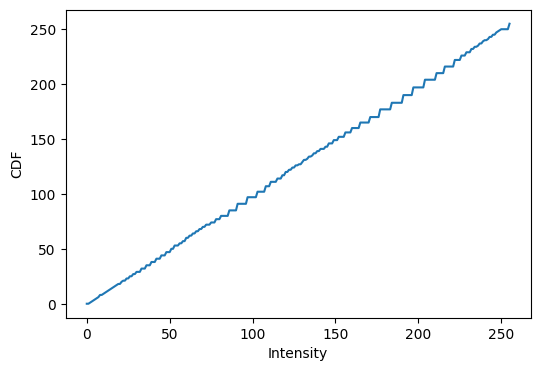

In [ ]:
cdf_eq = get_cdf(get_histogram(img_eq, 256))

nj = (cdf_eq - cdf_eq.min()) * 255
N = cdf_eq.max() - cdf_eq.min()

cdf_eq = nj / N

cdf_eq = cdf_eq.astype('uint8')

plt.figure(figsize=(6,4))
plt.ylabel('CDF')
plt.xlabel('Intensity')
plt.plot(cdf_eq);

In [ ]:
img_eq = np.reshape(img_eq, img.shape)

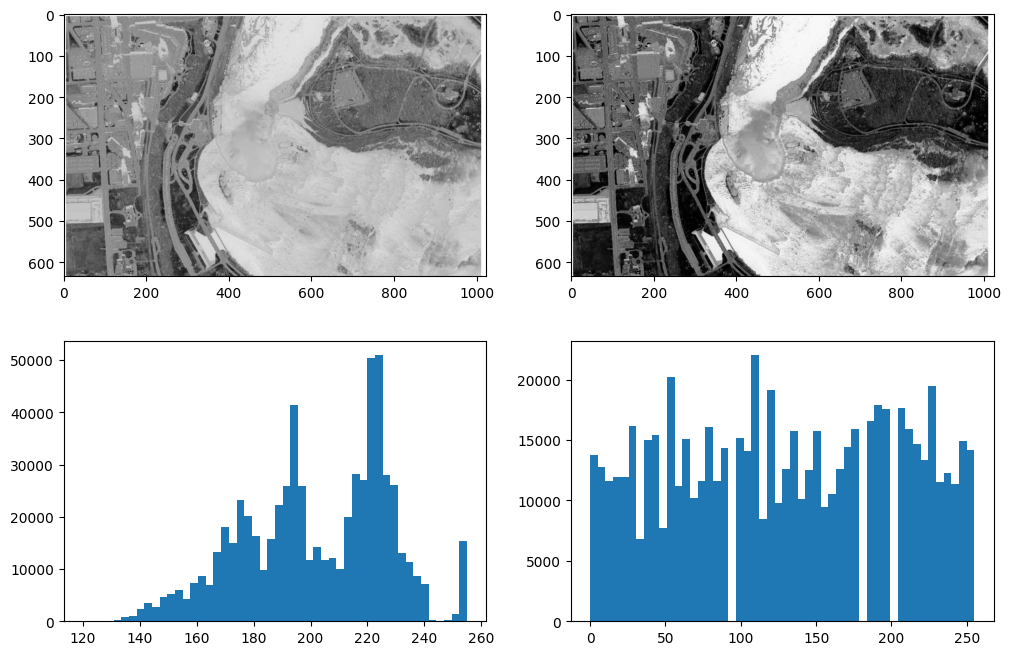

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(2,2,1)
plt.imshow(img, cmap='gray')
fig.add_subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')

plt.subplot(2,2,3)
flat = img.flatten()
plt.hist(flat, bins=50)

plt.subplot(2,2,4)
flat_new = img_eq.flatten()
plt.hist(flat_new, bins=50)

plt.show(block=True)

## Undesired Cases

In [ ]:
import cv2

In [ ]:
# Low contrast tree art (mid result)
url = "https://media.istockphoto.com/id/1272261194/photo/cold-winters-morning-in-sweden-with-mist-and-hoar-frost.jpg?b=1&s=612x612&w=0&k=20&c=wGbVDip_IEW6cz1UiIaetaMvgc8cvLP6-EiO9oS5UlQ=" # @param {type:"string"}

download_image(url, "image2")

In [ ]:
img = Image.open('image2')
img = img.convert('L')

img = np.array(img)

# Apply histogram equalization.
img_eq= cv2.equalizeHist(img)


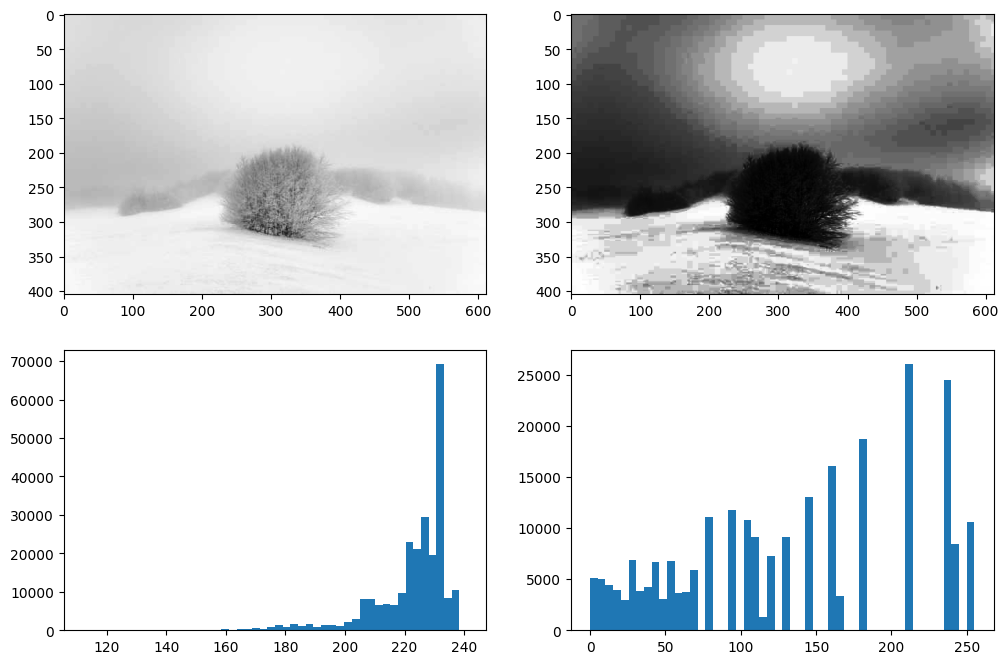

In [ ]:
fig = plt.figure(figsize=(12,8))
fig.add_subplot(2,2,1)
plt.imshow(img, cmap='gray')
fig.add_subplot(2,2,2)
plt.imshow(img_eq, cmap='gray')

plt.subplot(2,2,3)
flat = img.flatten()
plt.hist(flat, bins=50)

plt.subplot(2,2,4)
flat_new = img_eq.flatten()
plt.hist(flat_new, bins=50)

plt.show(block=True)